In [1]:
import qutip as qt
import matplotlib.pyplot as plt
import numpy as np

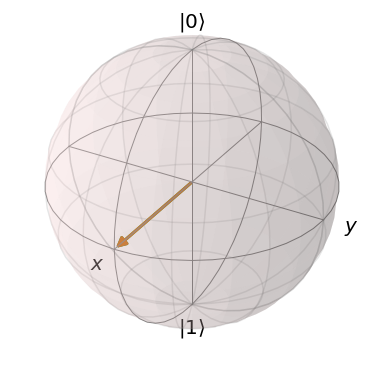

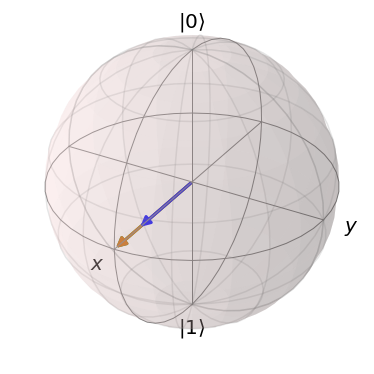

In [2]:
# Problem 2
Psi = (qt.ket("0") + qt.ket("1")).unit()
r = (1, 0, 0)

b = qt.Bloch()
b.add_states(Psi)
b.add_vectors(r)
b.show()

r = (0.7, 0, 0)
b.add_vectors(r)
b.show()

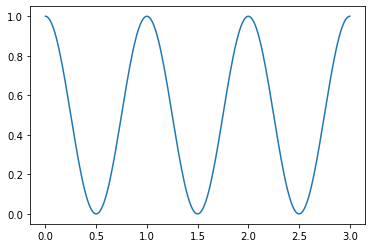

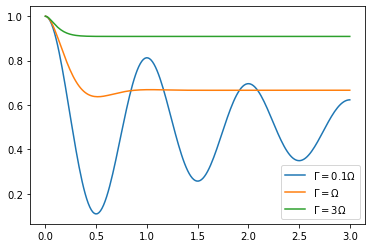

100.0%. Run time:   0.00s. Est. time left: 00:00:00:00
Total run time:   0.01s
100.0%. Run time:   0.00s. Est. time left: 00:00:00:00
Total run time:   0.01s
100.0%. Run time:   0.00s. Est. time left: 00:00:00:00
Total run time:   0.02s


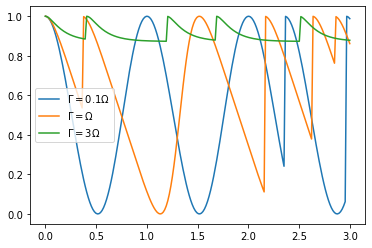

10.0%. Run time:   0.00s. Est. time left: 00:00:00:00
20.0%. Run time:   0.02s. Est. time left: 00:00:00:00
30.0%. Run time:   0.03s. Est. time left: 00:00:00:00
40.0%. Run time:   0.04s. Est. time left: 00:00:00:00
50.0%. Run time:   0.05s. Est. time left: 00:00:00:00
60.0%. Run time:   0.07s. Est. time left: 00:00:00:00
70.0%. Run time:   0.08s. Est. time left: 00:00:00:00
80.0%. Run time:   0.09s. Est. time left: 00:00:00:00
90.0%. Run time:   0.10s. Est. time left: 00:00:00:00
100.0%. Run time:   0.12s. Est. time left: 00:00:00:00
Total run time:   0.13s
10.0%. Run time:   0.00s. Est. time left: 00:00:00:00
20.0%. Run time:   0.01s. Est. time left: 00:00:00:00
30.0%. Run time:   0.03s. Est. time left: 00:00:00:00
40.0%. Run time:   0.04s. Est. time left: 00:00:00:00
50.0%. Run time:   0.06s. Est. time left: 00:00:00:00
60.0%. Run time:   0.07s. Est. time left: 00:00:00:00
70.0%. Run time:   0.09s. Est. time left: 00:00:00:00
80.0%. Run time:   0.10s. Est. time left: 00:00:00:00
90.

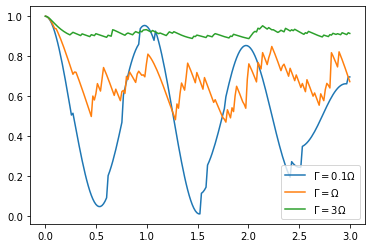

10.0%. Run time:   0.11s. Est. time left: 00:00:00:00
20.0%. Run time:   0.22s. Est. time left: 00:00:00:00
30.0%. Run time:   0.35s. Est. time left: 00:00:00:00
40.0%. Run time:   0.46s. Est. time left: 00:00:00:00
50.0%. Run time:   0.58s. Est. time left: 00:00:00:00
60.0%. Run time:   0.70s. Est. time left: 00:00:00:00
70.0%. Run time:   0.82s. Est. time left: 00:00:00:00
80.0%. Run time:   0.94s. Est. time left: 00:00:00:00
90.0%. Run time:   1.06s. Est. time left: 00:00:00:00
100.0%. Run time:   1.18s. Est. time left: 00:00:00:00
Total run time:   1.19s
10.0%. Run time:   0.16s. Est. time left: 00:00:00:01
20.0%. Run time:   0.30s. Est. time left: 00:00:00:01
30.0%. Run time:   0.44s. Est. time left: 00:00:00:01
40.0%. Run time:   0.58s. Est. time left: 00:00:00:00
50.0%. Run time:   0.73s. Est. time left: 00:00:00:00
60.0%. Run time:   0.87s. Est. time left: 00:00:00:00
70.0%. Run time:   1.03s. Est. time left: 00:00:00:00
80.0%. Run time:   1.19s. Est. time left: 00:00:00:00
90.

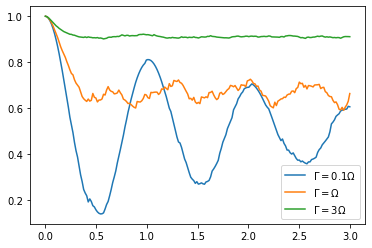

In [3]:
# Problem 5
delta = 0
Omega = 2 * np.pi
H = - delta / 2 * qt.sigmaz() + Omega / 2 * qt.sigmax()
Psi = qt.ket("1")
rho_0 = Psi * Psi.dag()
times = np.linspace(0, 3, 200)
rho_t = qt.mesolve(H, rho_0, times).states
plt.plot(times, [qt.expect(rho, Psi) for rho in rho_t])
plt.show()

for Gamma, label in [(0.1 * Omega, "$\Gamma=0.1\Omega$"),
                     (Omega, "$\Gamma=\Omega$"),
                     (3 * Omega, "$\Gamma=3\Omega$")]:
    c_ops = np.sqrt(Gamma) * qt.sigmam()
    rho_t = qt.mesolve(H, rho_0, times, c_ops).states
    plt.plot(times, [qt.expect(rho, Psi) for rho in rho_t], label=label)
plt.legend()
plt.show()

for ntraj in [1, 10, 100]:
    for Gamma, label in [(0.1 * Omega, "$\Gamma=0.1\Omega$"),
                         (Omega, "$\Gamma=\Omega$"),
                         (3 * Omega, "$\Gamma=3\Omega$")]:
        c_ops = np.sqrt(Gamma) * qt.sigmam()
        rho_t = qt.mcsolve(H, Psi, times, c_ops, ntraj=ntraj).states
        plt.plot(times, [qt.expect(rho, Psi) for rho in rho_t], label=label)
    plt.legend()
    plt.show()